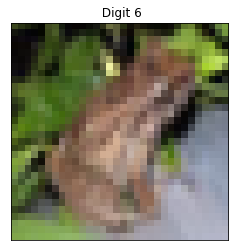

0 242
(50000, 32, 32, 3)
(10000, 32, 32, 3)


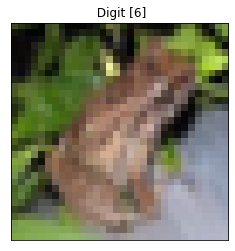

0.0 0.9490196


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# helper functions
def show_min_max(array, i):
    random_image = array[i]
    print(random_image.min(), random_image.max())

def plot_image(array, i, labels):
    plt.imshow(np.squeeze(array[i]))
    plt.title(" Digit " + str(labels[i]))
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
#Variables to keep track of image size
img_rows, img_cols = 32, 32

# The number of posssible output classes in this dataset
num_classes = 10

# The names of each output class. 
# The network will use numbers to represent each of these, but you will need to decode the networks guess using this list. 
label_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = cifar10.load_data()

# Convert the train and test labels to the right kind of list
train_labels_backup = [item for sublist in train_labels_backup for item in sublist] 
test_labels_backup = [item for sublist in test_labels_backup for item in sublist] 

input_shape = (img_rows, img_cols, 3)

# Print out the 100th image
plot_image(train_images, 2978, train_labels_backup)
# Show it's min and max value
show_min_max(train_images, 2978)

print(train_images.shape) 
print(test_images.shape)

#Convert the images to the float32 data type
train_images = train_images.astype('float32') 
test_images = test_images.astype('float32') 

#Normalize the data into values between 0 and 1
train_images /= 255
test_images /= 255

plot_image(train_images, 2978, train_labels) 
show_min_max(train_images, 2978)

train_labels = keras.utils.to_categorical(train_labels, num_classes) 
test_labels = keras.utils.to_categorical(test_labels, num_classes)

In [6]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization 

epochs=10
batch_size=64
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='softplus'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu')) 
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=128, activation='softplus')) 
model.add(Dense(units=num_classes, activation='softmax')) 

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_images, test_labels), shuffle=True)
scores = model.evaluate(test_images, test_labels,verbose=0) 
print('Test accuracy:', scores[1])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 32)       